Linear Regression


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

df=pd.read_csv('/content/drive/MyDrive/1000_Companies.csv')

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


Text(0.5, 1.0, 'R&D Spend vs Profit')

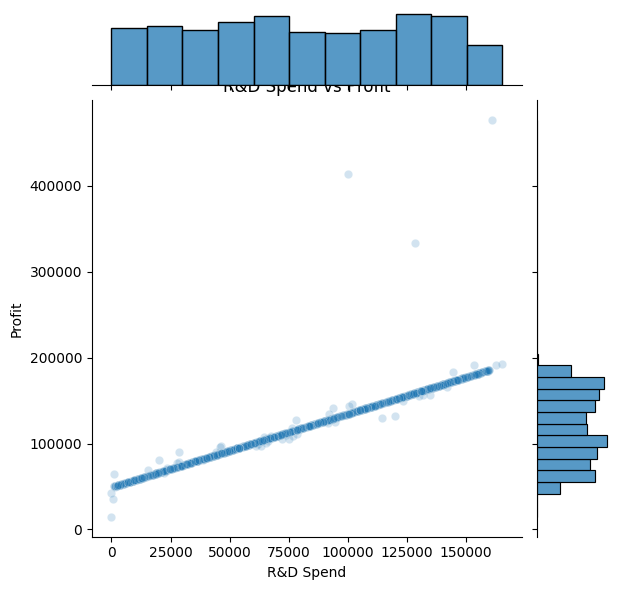

In [8]:
sns.jointplot(x='R&D Spend',y='Profit',data=df, alpha=0.2)
plt.title('R&D Spend vs Profit')

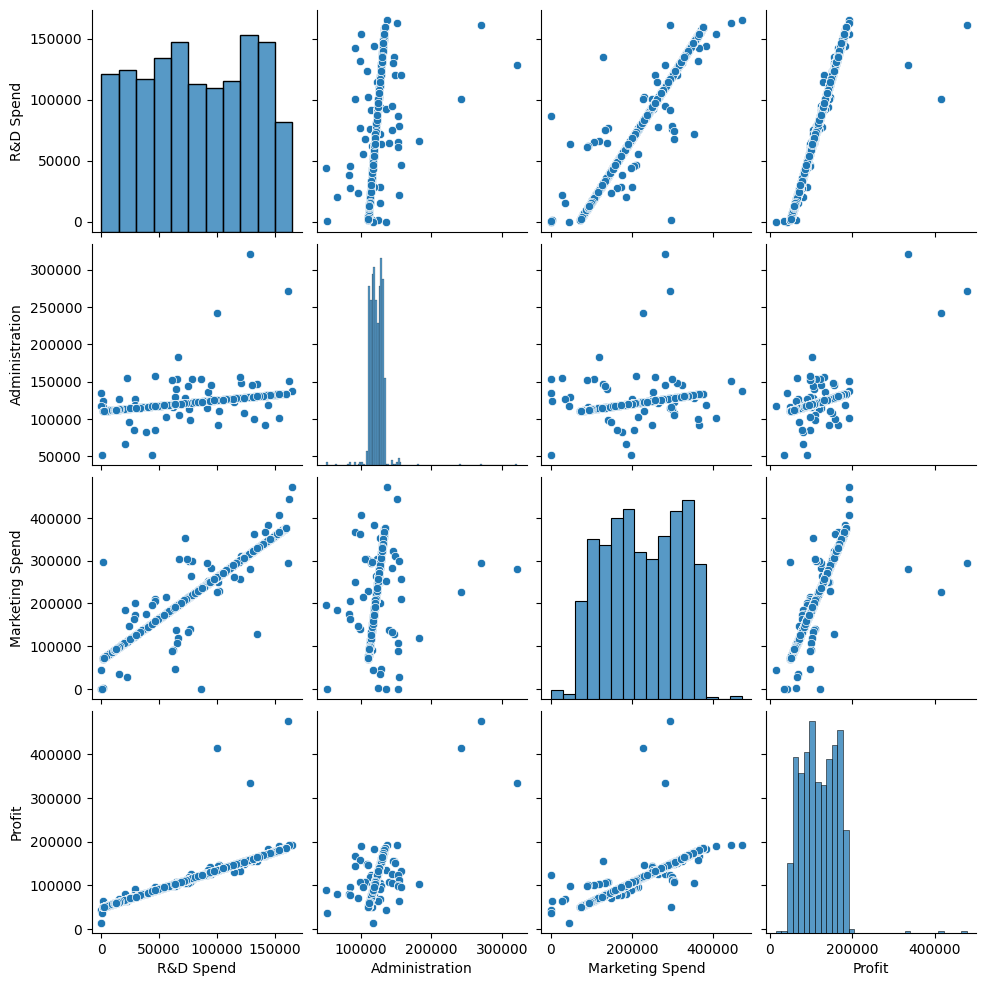

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.model_selection import train_test_split
x = df[['R&D Spend','Administration','Marketing Spend']]
y = df[['Profit']]

In [11]:
print(x,y)

     R&D Spend  Administration  Marketing Spend
0    165349.20      136897.800      471784.1000
1    162597.70      151377.590      443898.5300
2    153441.51      101145.550      407934.5400
3    144372.41      118671.850      383199.6200
4    142107.34       91391.770      366168.4200
..         ...             ...              ...
995   54135.00      118451.999      173232.6695
996  134970.00      130390.080      329204.0228
997  100275.47      241926.310      227142.8200
998  128456.23      321652.140      281692.3200
999  161181.72      270939.860      295442.1700

[1000 rows x 3 columns]            Profit
0    192261.83000
1    191792.06000
2    191050.39000
3    182901.99000
4    166187.94000
..            ...
995   95279.96251
996  164336.60550
997  413956.48000
998  333962.19000
999  476485.43000

[1000 rows x 1 columns]


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)


In [13]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
lr.coef_

array([[0.5225476 , 1.10417227, 0.09286345]])

In [15]:
predictions=lr.predict(x_test)

Text(0.5, 1.0, 'Predictions vs. Actual Values')

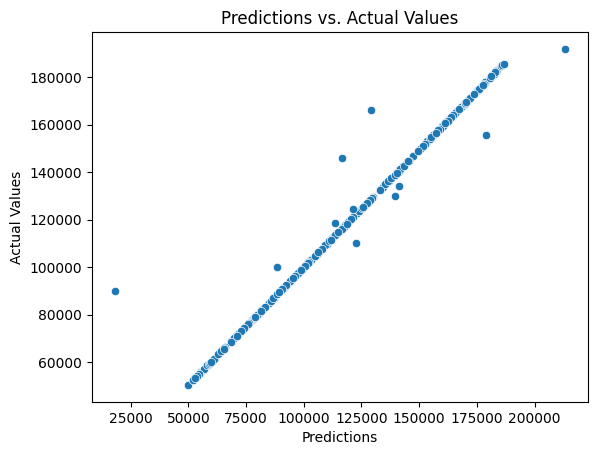

In [16]:
sns.scatterplot(x=predictions.ravel(), y=y_test.values.ravel())
# Providing x and y values as keyword arguments to sns.scatterplot()
# .ravel() is used to convert predictions and y_test into 1-D arrays,
# which is often required for plotting with seaborn.
# .values is used to extract the underlying NumPy array from the pandas Series/DataFrame
plt.xlabel("Predictions") # Add label to x-axis
plt.ylabel("Actual Values") # Add label to y-axis
plt.title("Predictions vs. Actual Values") # Add title to the plot

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:', r2_score(y_test, predictions))

MAE: 1203.1109291457242
MSE: 29808758.73077875
RMSE: 5459.739804311076
R2 Score: 0.9809424814366702


In [18]:
new_data=pd.DataFrame({'R&D Spend':[160000],'Administration':[130000],'Marketing Spend':[300000]})
prediction_new=lr.predict(new_data)
print(prediction_new)

[[175085.77446336]]


In [19]:
def prediction_profit(R_D_Spend,Administration,Marketing_Spend):
  new_data=pd